# EDA

In [1]:
# munging imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('gmdc_df_clean.csv')

In [3]:
df_eda = df.copy()

In [4]:
df_eda.head()

,Star Client,Loan Type,Requested Loan Amount,Revenue,Age,Income Source,Credit Type,Monthly Income,Car Owner,Returning Client,State,Home Owner,Armed forces,Created DOW,Created Time Braket,Duration_Mod_Cre
0,0,Payday,500.0,0.18,56.000000,Job Employment,poor,1000.0,No,No,North Carolina,No,No,Tuesday,Morning,1586:32:00
1,0,Payday,100.0,0.25,38.814992,Job Employment,poor,1000.0,No,No,Oklahoma,No,No,Friday,Morning,17351:23:00
2,0,Personal Loan,500.0,0.00,58.000000,Job Employment,fair,5000.0,Yes,No,Pennsylvania,No,No,Saturday,Afternoon,563:34:00
3,0,Payday,400.0,0.18,28.000000,Job Employment,fair,2500.0,No,No,Ohio,Yes,No,Saturday,Evening,764:22:00
4,0,Payday,400.0,0.09,44.000000,Job Employment,poor,2000.0,Yes,No,Texas,No,No,Sunday,Afternoon,1605:35:00


0    93.778802
1     6.221198
Name: Star Client, dtype: float64


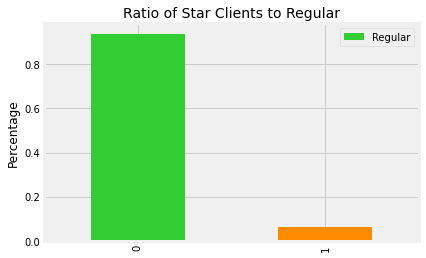

In [5]:
clients = df_eda['Star Client'].value_counts(normalize=True) 
print(clients*100)

clients.plot(kind='bar', color=['limegreen','darkorange'], ylabel='Percentage');
plt.legend(['Regular','Star'], loc="upper right")
plt.title('Ratio of Star Clients to Regular', fontdict = {'fontsize' : 14});

/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


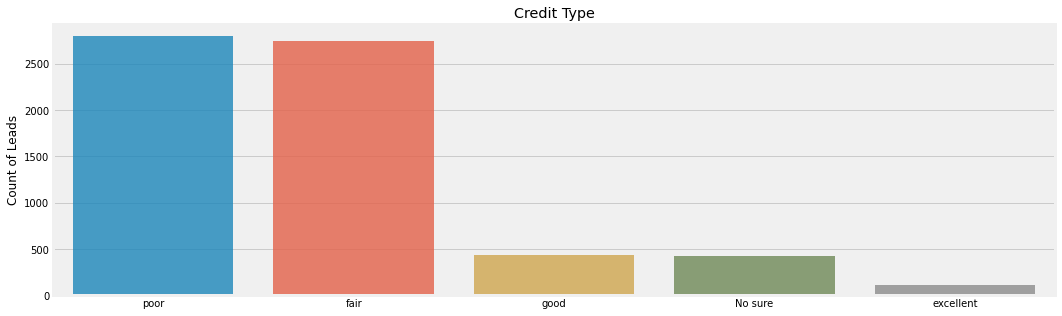

In [6]:
credit_type_count = df_eda['Credit Type'].value_counts()
plt.figure(figsize=(16,5))
sns.barplot(credit_type_count.index, credit_type_count.values, alpha=0.8)
plt.title('Credit Type')
plt.ylabel('Count of Leads', fontsize=12);

/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


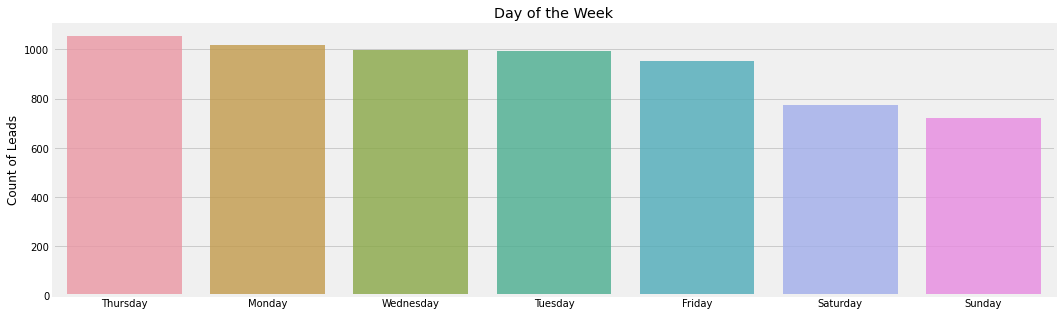

In [7]:
dow_count = df_eda['Created DOW'].value_counts()
plt.figure(figsize=(16,5))
sns.barplot(dow_count.index, dow_count.values, alpha=0.8)
plt.title('Day of the Week')
plt.ylabel('Count of Leads', fontsize=12);

/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


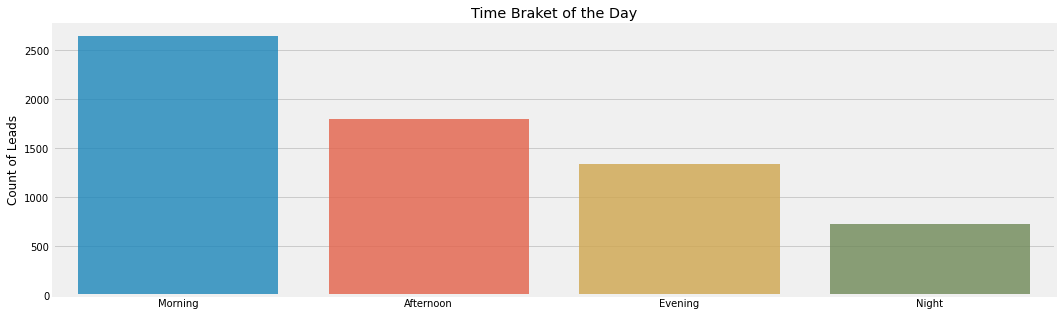

In [8]:
time_braket_count = df_eda['Created Time Braket'].value_counts()
plt.figure(figsize=(16,5))
sns.barplot(time_braket_count.index, time_braket_count.values, alpha=0.8)
plt.title('Time Braket of the Day')
plt.ylabel('Count of Leads', fontsize=12);

No     54.823349
Yes    45.176651
Name: Car Owner, dtype: float64


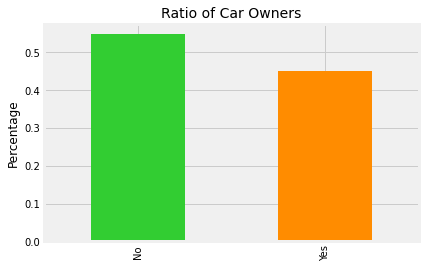

In [9]:
car_owner = df_eda['Car Owner'].value_counts(normalize=True) 
print(car_owner*100)

car_owner.plot(kind='bar', color=['limegreen', 'darkorange'], ylabel='Percentage');
#plt.legend(['Not A Car Owner', 'Car Owner'], loc="upper right");
plt.title('Ratio of Car Owners', fontdict = {'fontsize' : 14});

No     98.986175
Yes     1.013825
Name: Armed forces, dtype: float64


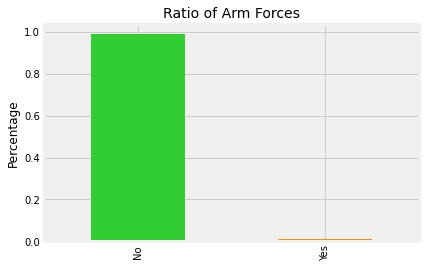

In [10]:
arm_for = df_eda['Armed forces'].value_counts(normalize=True) 
print(arm_for*100)

arm_for.plot(kind='bar', color=['limegreen', 'darkorange'], ylabel='Percentage');
#plt.legend(['Not A Car Owner', 'Car Owner'], loc="upper right");
plt.title('Ratio of Arm Forces', fontdict = {'fontsize' : 14});

Personal Loan    2470
Installment      2271
Payday           1769
Name: Loan Type, dtype: int64


/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


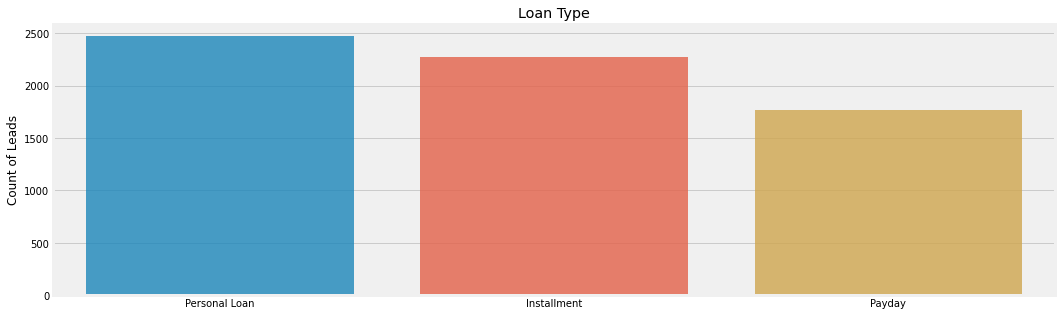

In [11]:
loan_type_count = df_eda['Loan Type'].value_counts()
print(loan_type_count)
plt.figure(figsize=(16,5))
sns.barplot(loan_type_count.index, loan_type_count.values, alpha=0.8)
plt.title('Loan Type')
plt.ylabel('Count of Leads', fontsize=12);

In [12]:
#Changing States into 4 regions for dummies
West = ['California', 'Alaska','Nevada','Hawaii','Utah','Colorado','Oregon','Washington','Idaho','Montana','Wyoming']
Southwest = ['Arizona','New Mexico','Oklahoma','Texas']
Midwest = ['North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri','Illinois','Indiana','Wisconsin','Michigan','Ohio']
Southeast = ['Arkansas','Louisiana','Mississippi','Alabama','Tennessee','Kentucky','Florida','Georgia','South Carolina','North Carolina','Virginia','West Virginia','Maryland','Delaware','District of Columbia']
Northeast = ['New Jersey','Pennsylvania','New York','Connecticut','Rhode Island','Massachusetts','Vermont','New Hampshire','Maine']
Arm_force = ['Armed Forces Europe','Armed Forces Pacific','Armed Forces Americas']

In [13]:
def state_change(row):
    if row['State'] in West:
        row['State'] = 'West'
    elif row['State'] in Southwest:
        row['State'] = 'Southwest'
    elif row['State'] in Midwest:
        row['State'] = 'Midwest'
    elif row['State'] in Southeast:
        row['State'] = 'Southeast'
    elif row['State'] in Northeast:
        row['State'] = 'Northeast'
    elif row['State'] in Arm_force:
        row['State'] = 'Arm Force'
    return row


In [14]:
df_eda = df_eda.apply(state_change,axis = 1)

In [15]:
df_eda.head()

,Star Client,Loan Type,Requested Loan Amount,Revenue,Age,Income Source,Credit Type,Monthly Income,Car Owner,Returning Client,State,Home Owner,Armed forces,Created DOW,Created Time Braket,Duration_Mod_Cre
0,0,Payday,500.0,0.18,56.000000,Job Employment,poor,1000.0,No,No,Southeast,No,No,Tuesday,Morning,1586:32:00
1,0,Payday,100.0,0.25,38.814992,Job Employment,poor,1000.0,No,No,Southwest,No,No,Friday,Morning,17351:23:00
2,0,Personal Loan,500.0,0.00,58.000000,Job Employment,fair,5000.0,Yes,No,Northeast,No,No,Saturday,Afternoon,563:34:00
3,0,Payday,400.0,0.18,28.000000,Job Employment,fair,2500.0,No,No,Midwest,Yes,No,Saturday,Evening,764:22:00
4,0,Payday,400.0,0.09,44.000000,Job Employment,poor,2000.0,Yes,No,Southwest,No,No,Sunday,Afternoon,1605:35:00


Southeast    2493
Midwest      1478
Southwest    1353
West          911
Northeast     267
Arm Force       8
Name: State, dtype: int64


/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Leads from Regions')

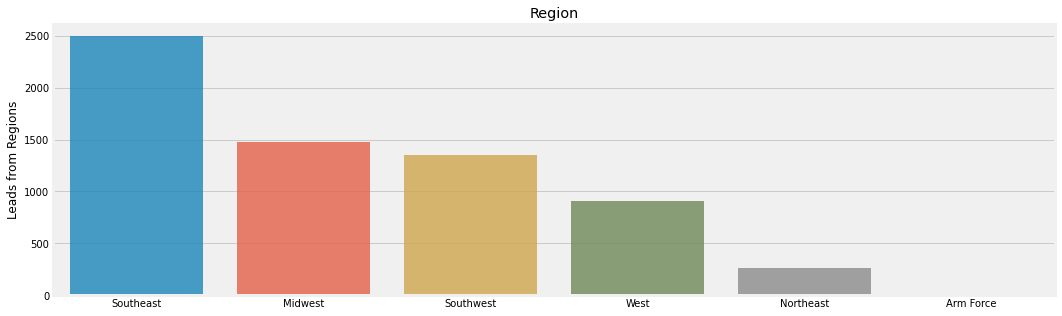

In [16]:
region_count = df_eda['State'].value_counts()
print(region_count)
plt.figure(figsize=(16,5))
sns.barplot(region_count.index, region_count.values, alpha=0.8)
plt.title('Region')
plt.ylabel('Leads from Regions', fontsize=12)

In [18]:
'''bin_count = df_eda['bin'].value_counts()
print(bin_count)
plt.figure(figsize=(16,5))
sns.barplot(bin_count.index, bin_count.values, alpha=0.8)
plt.title('Age Braket')
plt.ylabel('Lead Count', fontsize=12)'''

"bin_count = df_eda['bin'].value_counts()\nprint(bin_count)\nplt.figure(figsize=(16,5))\nsns.barplot(bin_count.index, bin_count.values, alpha=0.8)\nplt.title('Age Braket')\nplt.ylabel('Lead Count', fontsize=12)"

# Baselining

In [19]:
df_class = df_eda.copy()

In [20]:
df_class.head()

,Star Client,Loan Type,Requested Loan Amount,Revenue,Age,Income Source,Credit Type,Monthly Income,Car Owner,Returning Client,State,Home Owner,Armed forces,Created DOW,Created Time Braket,Duration_Mod_Cre
0,0,Payday,500.0,0.18,56.000000,Job Employment,poor,1000.0,No,No,Southeast,No,No,Tuesday,Morning,1586:32:00
1,0,Payday,100.0,0.25,38.814992,Job Employment,poor,1000.0,No,No,Southwest,No,No,Friday,Morning,17351:23:00
2,0,Personal Loan,500.0,0.00,58.000000,Job Employment,fair,5000.0,Yes,No,Northeast,No,No,Saturday,Afternoon,563:34:00
3,0,Payday,400.0,0.18,28.000000,Job Employment,fair,2500.0,No,No,Midwest,Yes,No,Saturday,Evening,764:22:00
4,0,Payday,400.0,0.09,44.000000,Job Employment,poor,2000.0,Yes,No,Southwest,No,No,Sunday,Afternoon,1605:35:00


In [21]:
df_class.drop('Revenue', axis=1, inplace=True)

In [22]:
df_class.drop('Duration_Mod_Cre', axis=1, inplace=True)

In [24]:
#df_class.drop('bin', axis=1, inplace=True)

In [25]:
df_class.head()

,Star Client,Loan Type,Requested Loan Amount,Age,Income Source,Credit Type,Monthly Income,Car Owner,Returning Client,State,Home Owner,Armed forces,Created DOW,Created Time Braket
0,0,Payday,500.0,56.000000,Job Employment,poor,1000.0,No,No,Southeast,No,No,Tuesday,Morning
1,0,Payday,100.0,38.814992,Job Employment,poor,1000.0,No,No,Southwest,No,No,Friday,Morning
2,0,Personal Loan,500.0,58.000000,Job Employment,fair,5000.0,Yes,No,Northeast,No,No,Saturday,Afternoon
3,0,Payday,400.0,28.000000,Job Employment,fair,2500.0,No,No,Midwest,Yes,No,Saturday,Evening
4,0,Payday,400.0,44.000000,Job Employment,poor,2000.0,Yes,No,Southwest,No,No,Sunday,Afternoon


In [26]:
#imbalanced Data

0    93.778802
1     6.221198
Name: Star Client, dtype: float64


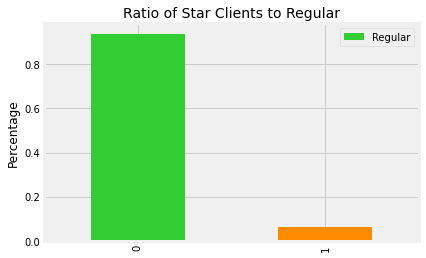

In [27]:
clients = df_class['Star Client'].value_counts(normalize=True) 
print(clients*100)

clients.plot(kind='bar', color=['limegreen','darkorange'], ylabel='Percentage');
plt.legend(['Regular','Star'], loc="upper right")
plt.title('Ratio of Star Clients to Regular', fontdict = {'fontsize' : 14});

In [28]:
df_class['Star Client'].value_counts()

0    6105
1     405
Name: Star Client, dtype: int64

### Baseling with 1 feature

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

In [30]:
baseline_1 = df_class.loc[:,['Star Client','Requested Loan Amount']]

In [31]:
baseline_1.head()

,Star Client,Requested Loan Amount
0,0,500.0
1,0,100.0
2,0,500.0
3,0,400.0
4,0,400.0


In [32]:
X1, y1 = baseline_1.drop(['Star Client'], axis=1), baseline_1['Star Client']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X1_train)
X_test_sc = scaler.transform(X1_test)

## Logistic Regression

In [33]:
lr = LogisticRegression()
lr.fit(X_train_sc, y1_train)
lr_pred = lr.predict(X_test_sc)
lr_confusion = confusion_matrix(y1_test, lr_pred)

lr_ac = lr.score(X_test_sc, y1_test)
lr_precision = precision_score(y1_test, lr_pred)
lr_recall = recall_score(y1_test, lr_pred)
lr_f1 = f1_score(y1_test, lr_pred)

lr_y_score = lr.predict_proba(X_test_sc)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y1_test, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)

print(classification_report(y1_test, lr_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1218
           1       0.00      0.00      0.00        84

    accuracy                           0.94      1302
   macro avg       0.47      0.50      0.48      1302
weighted avg       0.88      0.94      0.90      1302



/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [34]:
print('Logistic Regression validation metrics with subset 1: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (lr_ac, 
         lr_precision, 
         lr_recall,
         lr_f1,
         roc_auc_lr)
     )

Logistic Regression validation metrics with subset 1: 
 Accuracy: 0.9355 
 Precision: 0.0000 
 Recall: 0.0000 
 F1: 0.0000 
 ROC: 0.6456


In [35]:
def make_confusion_matrix(model, threshold=0.50):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test_sc)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y1_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Regular', 'Star'],
           yticklabels=['Regular', 'Star']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

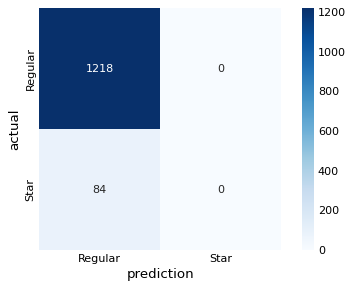

In [36]:
from sklearn.metrics import confusion_matrix
make_confusion_matrix(lr)

## KNN 

In [37]:
# initiate model and calculate error metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y1_train)
knn_pred = knn.predict(X_test_sc)
knn_confusion = confusion_matrix(y1_test,knn_pred)

knn_ac = knn.score(X_test_sc, y1_test)
knn_precision = precision_score(y1_test, knn_pred)
knn_recall = recall_score(y1_test, knn_pred)
knn_f1 = f1_score(y1_test, knn_pred)

print(classification_report(y1_test, knn_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1218
           1       0.00      0.00      0.00        84

    accuracy                           0.94      1302
   macro avg       0.47      0.50      0.48      1302
weighted avg       0.88      0.94      0.90      1302



/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [38]:
print('KNN validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (knn_ac, 
         knn_precision, 
         knn_recall,
         knn_f1)
     )

KNN validation metrics: 
 Accuracy: 0.9355 
 Precision: 0.0000 
 Recall: 0.0000 
 F1: 0.0000


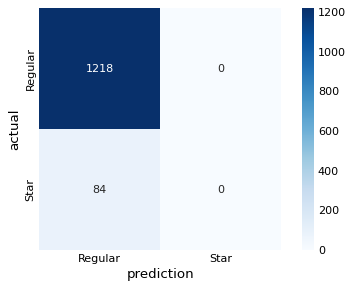

In [39]:
make_confusion_matrix(knn)

### Baselining with 3 numerical features

In [40]:
baseline_2 = df_class.loc[:,['Star Client','Requested Loan Amount','Age','Monthly  Income']]

In [41]:
baseline_2.head()

,Star Client,Requested Loan Amount,Age,Monthly Income
0,0,500.0,56.000000,1000.0
1,0,100.0,38.814992,1000.0
2,0,500.0,58.000000,5000.0
3,0,400.0,28.000000,2500.0
4,0,400.0,44.000000,2000.0


In [42]:
X2, y2 = baseline_2.drop(['Star Client'], axis=1), baseline_2['Star Client']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler2 = StandardScaler()
X_train_sc2 = scaler2.fit_transform(X2_train)
X_test_sc2 = scaler2.transform(X2_test)

### Logistic Regression

In [45]:
lr2 = LogisticRegression()
lr2.fit(X_train_sc2, y2_train)
lr2_pred = lr2.predict(X_test_sc2)
lr2_confusion = confusion_matrix(y2_test, lr2_pred)

lr2_ac = lr2.score(X_test_sc2, y2_test)
lr2_precision = precision_score(y2_test, lr2_pred)
lr2_recall = recall_score(y2_test, lr2_pred)
lr2_f1 = f1_score(y2_test, lr2_pred)

lr_y_score2 = lr2.predict_proba(X_test_sc2)[:,1]
lr_fpr2, lr_tpr2, lr_auc_thresholds2 = roc_curve(y2_test, lr_y_score2)
roc_auc_lr2 = auc(lr_fpr2, lr_tpr2)

print(classification_report(y2_test, lr2_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1218
           1       0.00      0.00      0.00        84

    accuracy                           0.94      1302
   macro avg       0.47      0.50      0.48      1302
weighted avg       0.88      0.94      0.90      1302



/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [46]:
print('Logistic Regression validation metrics with subset 1: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (lr2_ac, 
         lr2_precision, 
         lr2_recall,
         lr2_f1,
         roc_auc_lr2)
     )

Logistic Regression validation metrics with subset 1: 
 Accuracy: 0.9355 
 Precision: 0.0000 
 Recall: 0.0000 
 F1: 0.0000 
 ROC: 0.5733


In [51]:
print("logistic confusion matrix: \n\n", confusion_matrix(y2_test, lr2.predict(X2_test)))
#make_confusion_matrix(lr2)

logistic confusion matrix: 

 [[   0 1218]
 [   0   84]]
